In [2]:
!pip install shap

     |████████████████████████████████| 358kB 5.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491625 sha256=9b58e0725e2694eacdce2387ceb1d8baefb32f824258d2820ed81334b2ec7066
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

import shap

In [7]:
data = pd.read_csv("dataset.csv", names = ["MQ1", "MQ2", "MQ3", "MQ4", "MQ5", "MQ6","CO2"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MQ1     1845 non-null   int64
 1   MQ2     1845 non-null   int64
 2   MQ3     1845 non-null   int64
 3   MQ4     1845 non-null   int64
 4   MQ5     1845 non-null   int64
 5   MQ6     1845 non-null   int64
 6   CO2     1845 non-null   int64
dtypes: int64(7)
memory usage: 101.0 KB


In [9]:
data.head(5)

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6,CO2
0,670,696,1252,1720,1321,2431,4
1,641,674,1156,1652,1410,2433,4
2,642,646,1159,1643,1455,2361,4
3,640,590,1105,1608,1459,2427,4
4,616,627,1192,1637,1466,2447,4


In [19]:
data.shape

(1845, 7)

In [12]:
data["CO2"].unique()

array([4, 3, 1, 2])

In [13]:
data["CO2"].value_counts()

1    595
4    540
2    515
3    195
Name: CO2, dtype: int64

# Preprocessing
- Only Split the data
- No need of scaling the data as we are using Random Forest Classifier as **Tree based models don't require Scaled data**

In [16]:
def preprocess_inputs(df):
  df = df.copy()

  y = df["CO2"]
  X = df.drop("CO2", axis=1)

  X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, shuffle=True, random_state=30)

  return X_train, X_test, y_train, y_test

In [17]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [18]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1291
554
1291
554


In [20]:
X_train

,MQ1,MQ2,MQ3,MQ4,MQ5,MQ6
685,928,946,1573,1744,1782,1949
84,596,610,1162,1605,1398,2328
789,539,630,1238,1623,1145,2169
821,399,501,955,1459,1066,2317
1065,525,624,1131,1590,1277,2085
...,...,...,...,...,...,...
500,554,584,1146,1582,1248,2407
1837,477,533,1088,1625,958,2126
941,500,574,1118,1556,1144,2141
421,820,880,1283,1781,1736,2490


In [21]:
y_test

1500    1
1531    2
1422    2
1698    1
471     1
       ..
1132    4
1095    1
1768    1
1636    1
678     3
Name: CO2, Length: 554, dtype: int64

# Training the Model

In [22]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [24]:
accuracy = model.score(X_test, y_test)
print("Accuracy is: {:.2f}%".format(accuracy*100))

Accuracy is: 96.03%


#Impact of features using Shap Values

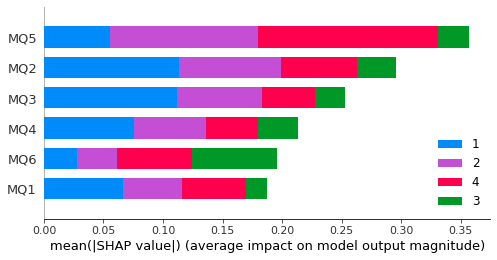

In [25]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=model.classes_)